# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2021**

Мягкий дедлайн: **27.10.21 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **29.10.21 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$\nabla Q(w) = 2X^T(Xw - y).$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam.jpg)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/29933/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: id: 55353357 ссылка: https://contest.yandex.ru/contest/29933/run-report/55353357/


* **StochasticDescent**: id: 55351502 ссылка: https://contest.yandex.ru/contest/29933/run-report/55351502/


* **MomentumDescent**: id: 55353052 ссылка: https://contest.yandex.ru/contest/29933/run-report/55353052/


* **Adam**: id: 55386956 ссылка: https://contest.yandex.ru/contest/29933/run-report/55386956/


* **LinearRegression**: id: 55468884 ссылка: https://contest.yandex.ru/contest/29933/run-report/55468884/


Мой ник в контесте umarchemurziev

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

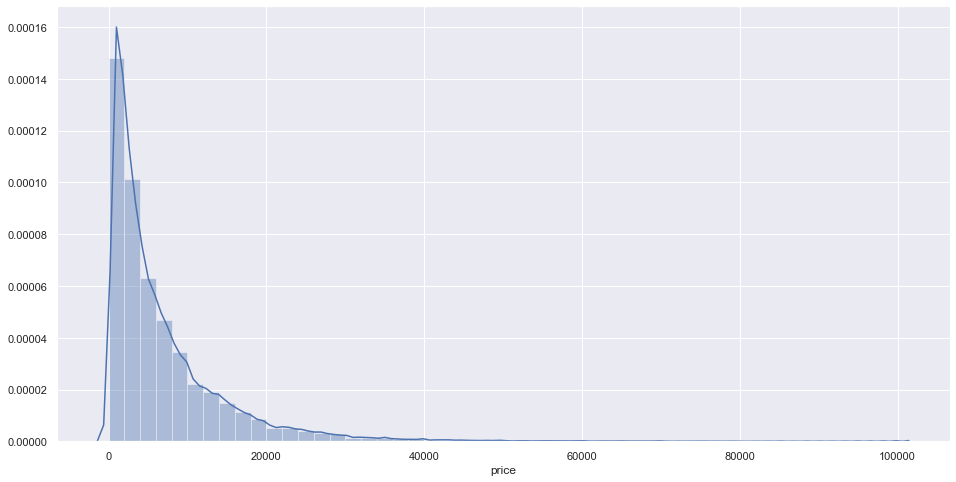

In [9]:
from matplotlib import figure


plt.figure(figsize=(16, 8))
sns.distplot(data.price)

По графику видим, что у нас чем меньше стоимость, тем больше автомобилей, поэтому приведем график к более нормальному виду взяв логарифм.

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500,7.313220
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600,8.188689
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650,6.476972
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200,7.696213
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000,7.600902
...,...,...,...,...,...,...,...,...,...,...,...
241185,volkswagen,golf,limousine,manuell,diesel,nein,140,150000,69,7900,8.974618
241186,seat,leon,limousine,manuell,benzin,ja,225,150000,142,3200,8.070906
241187,smart,fortwo,cabrio,automatik,benzin,nein,101,125000,192,1199,7.089243
241188,volkswagen,transporter,bus,manuell,diesel,nein,102,150000,241,9200,9.126959


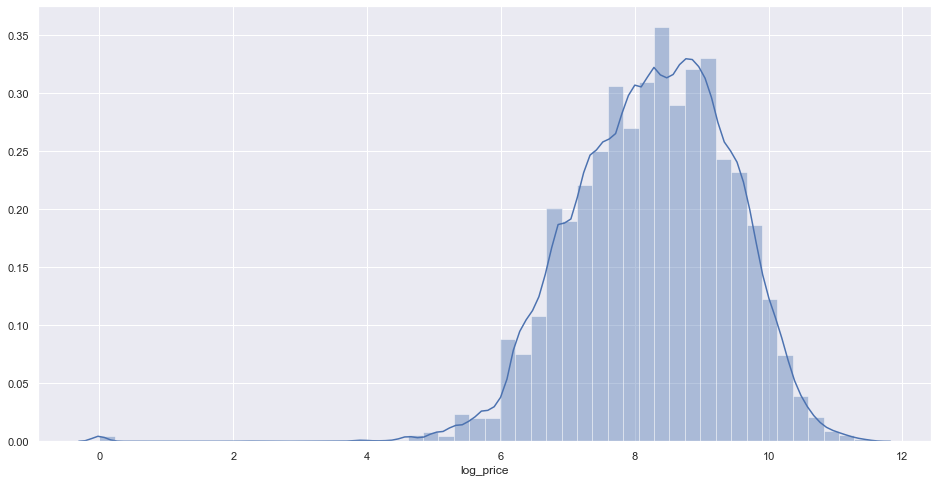

In [10]:
data["log_price"] = np.log(data["price"])
display(data)
plt.figure(figsize=(16, 8))
sns.distplot(data.log_price)

In [11]:
display(data.describe())

,powerPS,kilometer,autoAgeMonths,price,log_price
count,241190.000000,241190.000000,241190.000000,241190.000000,241190.000000
mean,131.271628,123766.677723,144.768676,6887.741892,8.264639
std,60.622613,39825.955933,73.092598,8024.451993,1.158965
min,51.000000,5000.000000,1.000000,1.000000,0.000000
25%,90.000000,100000.000000,92.000000,1750.000000,7.467371
50%,120.000000,150000.000000,140.000000,4100.000000,8.318742
75%,160.000000,150000.000000,192.000000,8999.000000,9.104869
max,589.000000,150000.000000,600.000000,99999.000000,11.512915


In [12]:
Q1 = data["log_price"].quantile(0.25)
Q3 = data["log_price"].quantile(0.75)
IQR = Q3 - Q1
data = data.query("(@Q1 - 1.5 * @IQR) <= log_price <= (@Q3 + 1.5 * @IQR)")

Источник: https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr

In [13]:
data.dtypes

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                  int64
log_price            float64
dtype: object

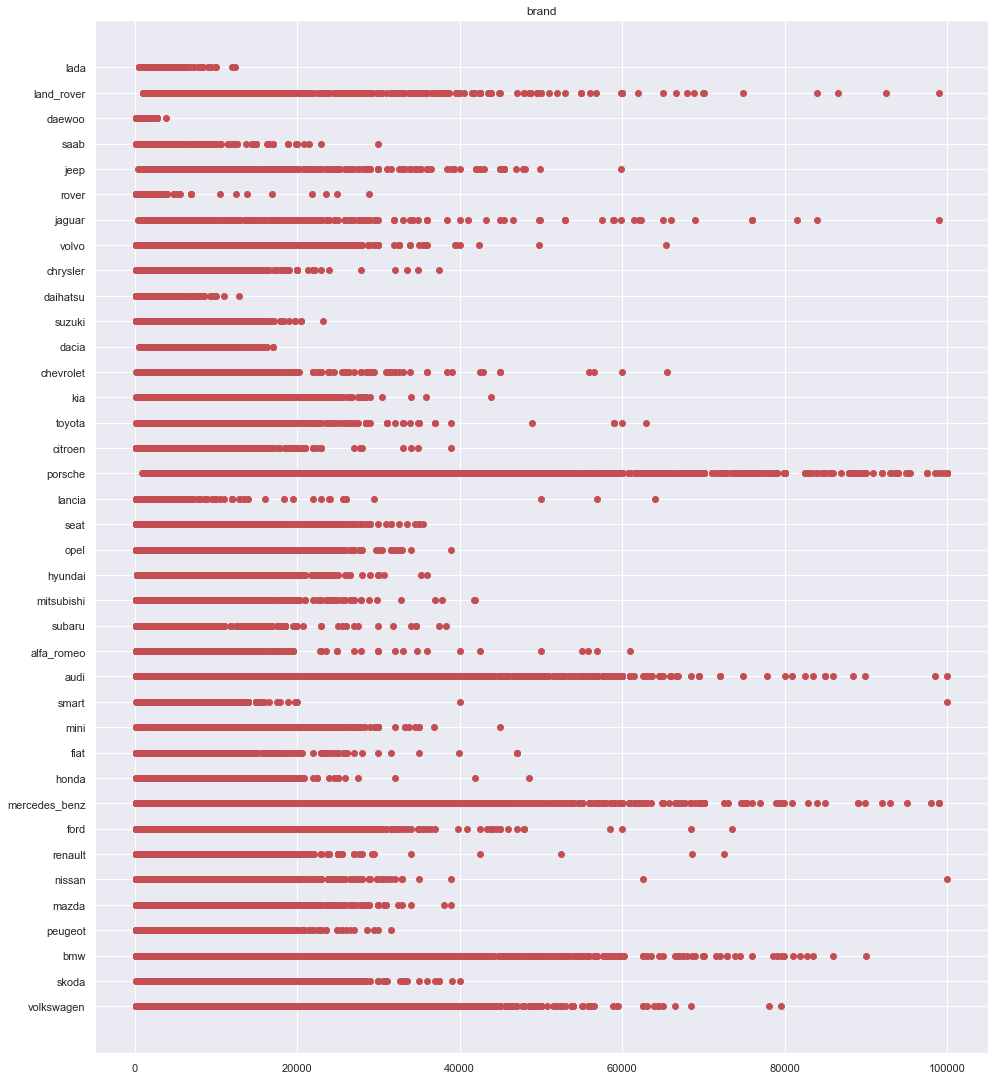

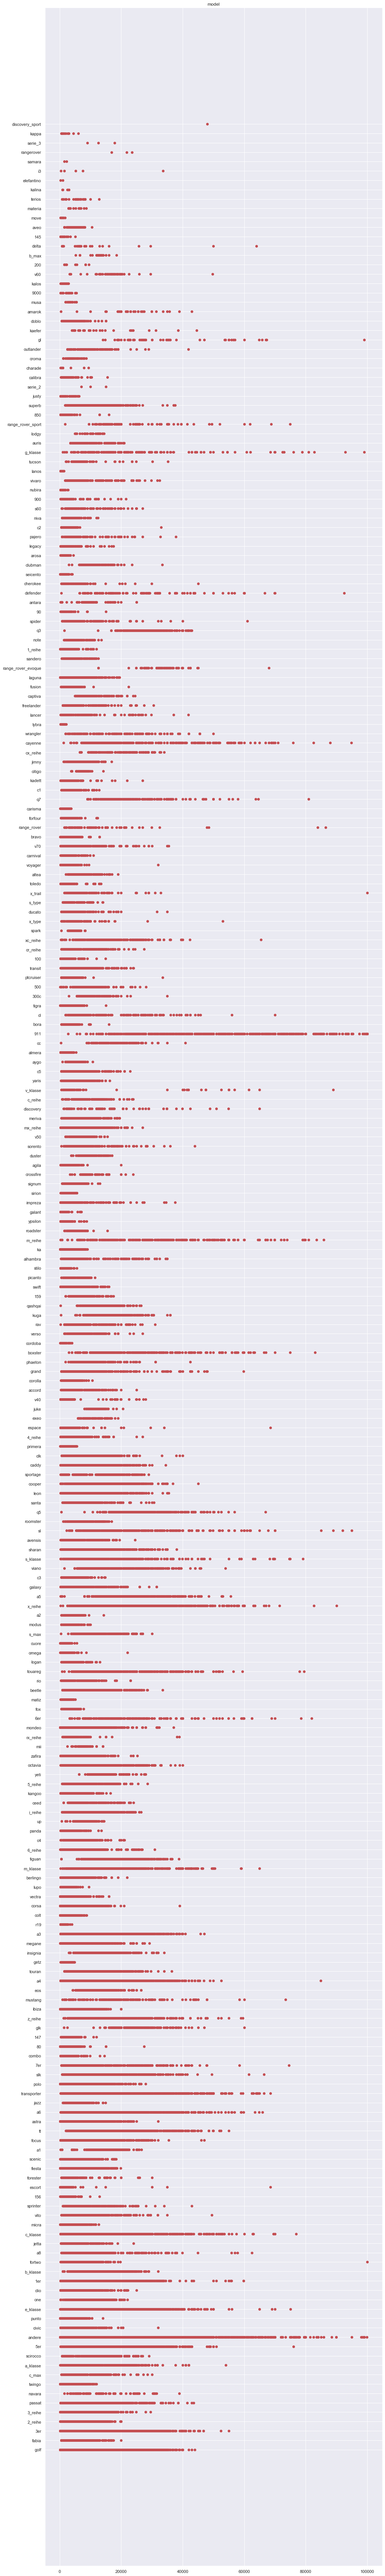

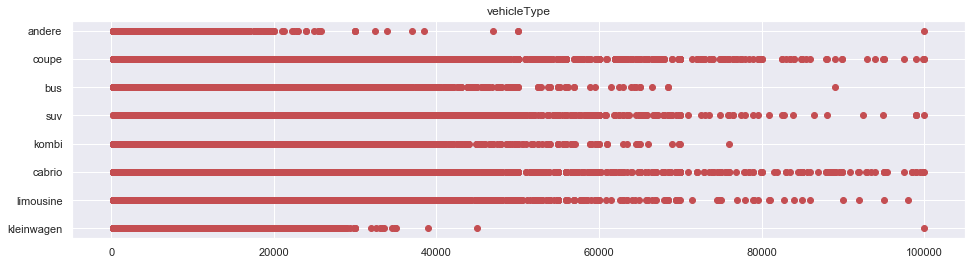

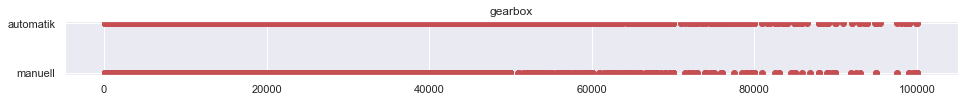

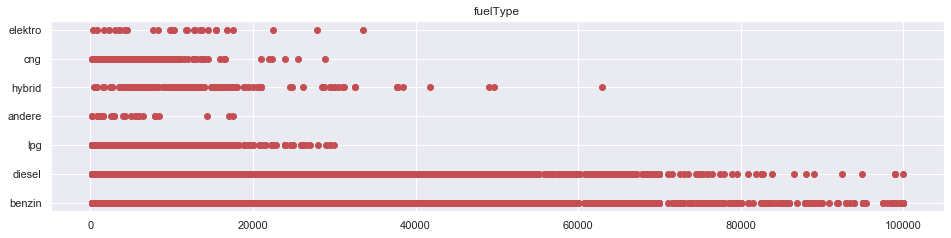

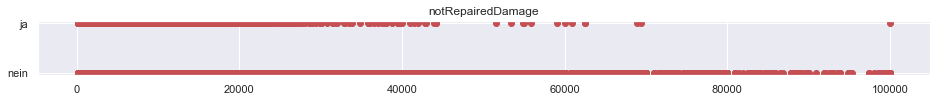

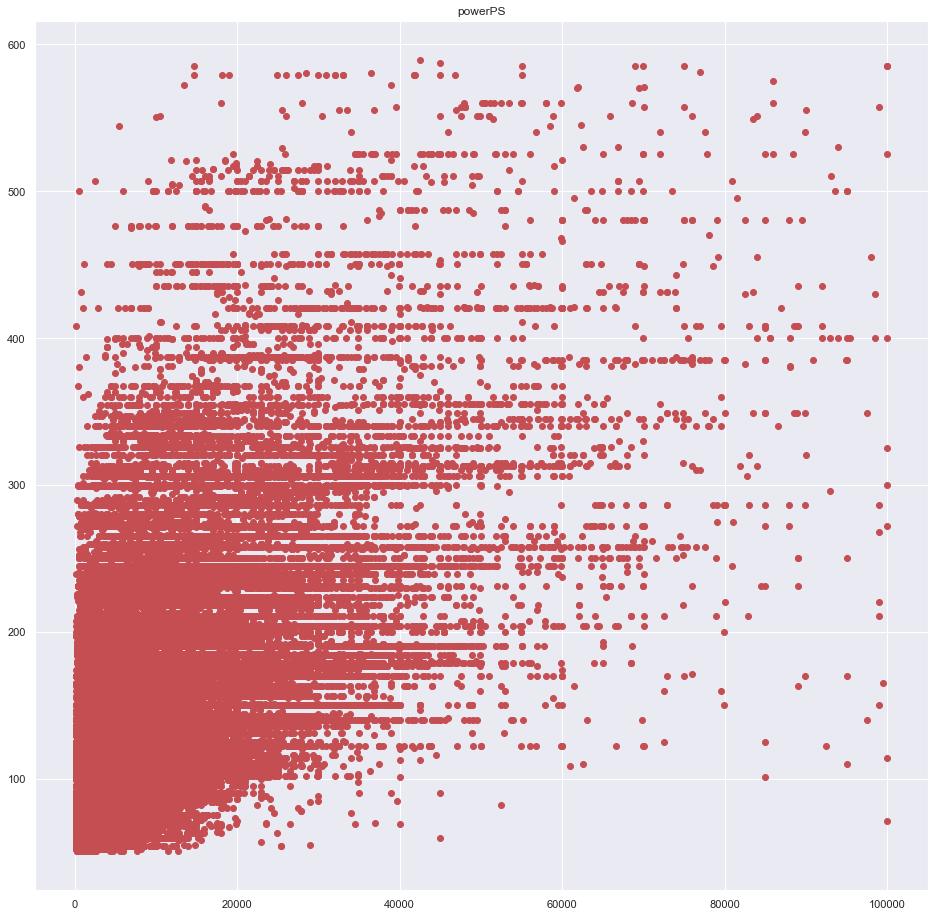

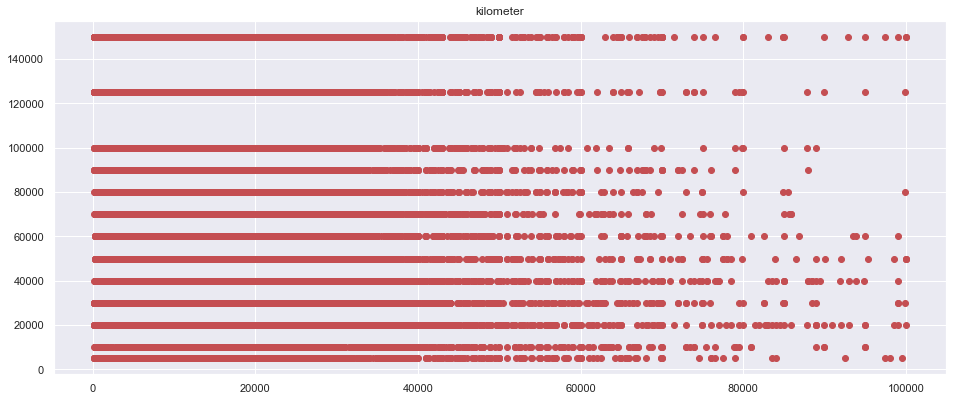

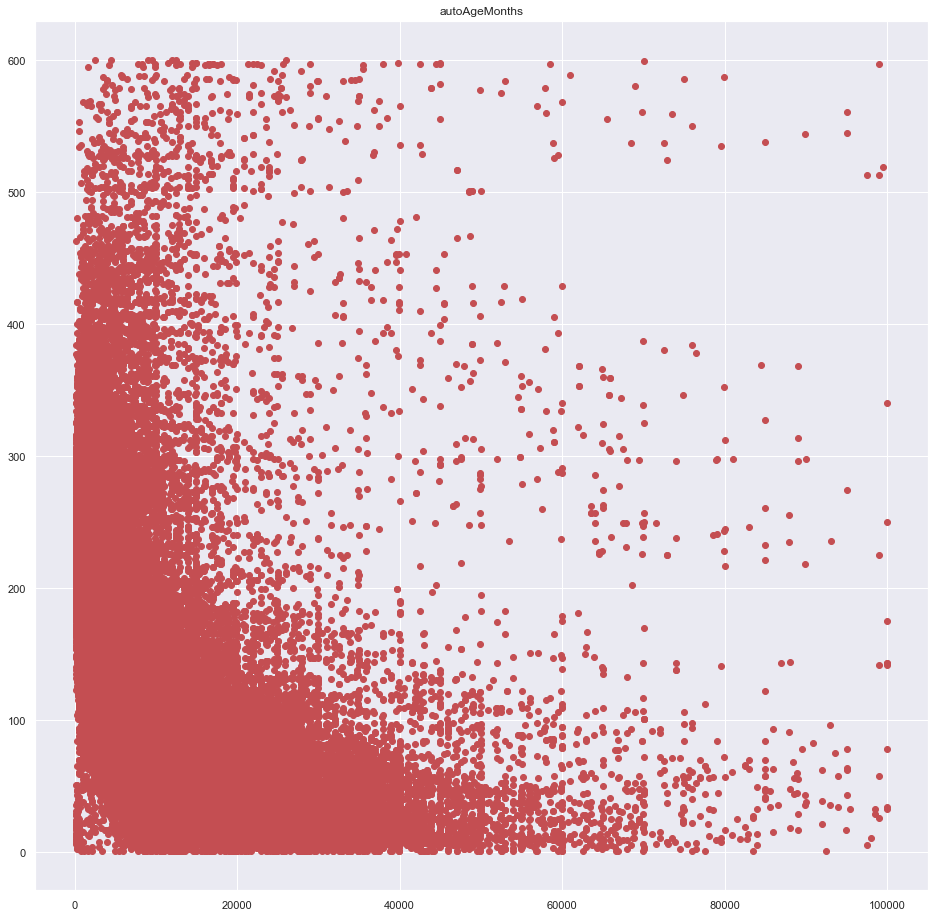

In [14]:
for column in data.columns.tolist()[:-2]:
    ln = len(data[column].unique().tolist()) / 2
    if column == "powerPS" or column == "autoAgeMonths":
        ln = 16
    plt.figure(figsize=(16, ln))
    plt.title(str(column))
    plt.plot(data.price, data[column],'ro')
    plt.show()

На мой взгляд все эти параметры важны при оценке.

К некоторые категориальным признакам хотелось бы применить OneHotEncoder.
Для признака "notRepairedDamage" лучше применить бинаризацию.

In [15]:
categorical = ["notRepairedDamage", "fuelType", "gearbox", "vehicleType", "model", "brand"]
numeric = ["powerPS", "kilometer", "autoAgeMonths", ]
other = []

In [16]:
x = data[categorical + numeric + other]
x['bias'] = 1
other += ['bias']

y = data['log_price']

/Users/umni/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
x

,notRepairedDamage,fuelType,gearbox,vehicleType,model,brand,powerPS,kilometer,autoAgeMonths,bias
0,nein,benzin,manuell,kleinwagen,golf,volkswagen,75,150000,177,1
1,nein,diesel,manuell,kleinwagen,fabia,skoda,69,90000,93,1
2,ja,benzin,manuell,limousine,3er,bmw,102,150000,246,1
3,nein,benzin,manuell,cabrio,2_reihe,peugeot,109,150000,140,1
4,nein,benzin,manuell,limousine,3_reihe,mazda,105,150000,136,1
...,...,...,...,...,...,...,...,...,...,...
241185,nein,diesel,manuell,limousine,golf,volkswagen,140,150000,69,1
241186,ja,benzin,manuell,limousine,leon,seat,225,150000,142,1
241187,nein,benzin,automatik,cabrio,fortwo,smart,101,125000,192,1
241188,nein,diesel,manuell,bus,transporter,volkswagen,102,150000,241,1


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=10)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [20]:
lambdas = np.logspace(-2, 0.5, 20)

In [21]:
import time
from tqdm import tqdm

## full##

In [48]:
from linear_regression import LinearRegression
from sklearn.metrics import r2_score


find_lambdas = dict()
find_losses = dict()
find_models = dict()
find_r2_lambdas = dict()
find_r2_losses = dict()
find_r2_models = dict()
best_r2_lambda = lambdas[0]
best_labda = lambdas[0]
best_loss = 0
best_r2_loss = 0
best_model = 0
best_r2_model = 0
it = 1
for lambda_ in tqdm(lambdas):
#     print(it)
    descent_config = {
        'descent_name': 'full',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': lambda_
        }
    }
    regression = LinearRegression(descent_config=descent_config)
    model = regression.fit(X_train, y_train)
    y_pred = regression.predict(X_val)
    loss = mean_squared_error(y_val, y_pred)
    r2_loss = r2_score(y_val, y_pred)
    if it == 1:
        best_loss = loss
        best_model = model
        best_r2_loss = r2_loss
        best_r2_model = model
    else:
        if loss < best_loss:
            best_loss = loss
            best_labda = lambda_
            best_model = model
        if r2_loss < best_r2_loss:
            best_r2_loss = r2_loss
            best_r2_lambda = lambda_
            best_r2_model = model
    it += 1

find_lambdas["full"] = best_labda
find_losses["full"] = best_loss
find_models["full"] = best_model

find_r2_lambdas["full"] = best_r2_lambda
find_r2_losses["full"] = best_r2_loss
find_r2_models["full"] = best_r2_model

100%|██████████| 20/20 [00:14<00:00,  1.38it/s]


## stochastic##

In [49]:
best_labda = lambdas[0]
best_r2_labda = lambdas[0]
it = 1

y_sup_train = y_train.reset_index().drop(columns="index")["log_price"]
y_sup_val = y_val.reset_index().drop(columns="index")["log_price"]
y_sup_test = y_test.reset_index().drop(columns="index")["log_price"]

for lambda_ in tqdm(lambdas):
    descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': lambda_
        }
    }
    regression = LinearRegression(descent_config=descent_config)
    model = regression.fit(X_train, y_sup_train)
    y_pred = regression.predict(X_val)
    loss = mean_squared_error(y_sup_val, y_pred)
    r2_loss = r2_score(y_sup_val, y_pred)
    if it == 1:
        best_loss = loss
        best_model = model
    else:
        if loss < best_loss:
            best_loss = loss
            best_labda = lambda_
            best_model = model
        if r2_loss < best_r2_loss:
            best_r2_loss = r2_loss
            best_r2_lambda = lambda_
            best_r2_model = model
    it += 1

find_lambdas["stochastic"] = best_labda
find_losses["stochastic"] = best_loss
find_models["stochastic"] = best_model

find_r2_lambdas["stochastic"] = best_r2_lambda
find_r2_losses["stochastic"] = best_r2_loss
find_r2_models["stochastic"] = best_r2_model

100%|██████████| 20/20 [00:34<00:00,  1.73s/it]


## momentum##

In [50]:
best_labda = lambdas[0]
best_r2_labda = lambdas[0]
it = 1
for lambda_ in tqdm(lambdas):
    descent_config = {
        'descent_name': 'momentum',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': lambda_
        }
    }
    regression = LinearRegression(descent_config=descent_config)
    model = regression.fit(X_train, y_train)
    y_pred = regression.predict(X_val)
    loss = mean_squared_error(y_val, y_pred)
    r2_loss = r2_score(y_val, y_pred)
    if it == 1:
        best_loss = loss
        best_model = model
    else:
        if loss < best_loss:
            best_loss = loss
            best_labda = lambda_
            best_model = model
        if r2_loss < best_r2_loss:
            best_r2_loss = r2_loss
            best_r2_lambda = lambda_
            best_r2_model = model
    it += 1

find_lambdas["momentum"] = best_labda
find_losses["momentum"] = best_loss
find_models["momentum"] = best_model

find_r2_lambdas["momentum"] = best_r2_lambda
find_r2_losses["momentum"] = best_r2_loss
find_r2_models["momentum"] = best_r2_model

100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


## adam##

In [51]:
best_labda = lambdas[0]
best_r2_labda = lambdas[0]
it = 1
for lambda_ in tqdm(lambdas):
    descent_config = {
        'descent_name': 'adam',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': lambda_
        }
    }
    regression = LinearRegression(descent_config=descent_config)
    model = regression.fit(X_train, y_train)
    y_pred = regression.predict(X_val)
    loss = mean_squared_error(y_val, y_pred)
    r2_loss = r2_score(y_val, y_pred)
    if it == 1:
        best_loss = loss
        best_model = model
    else:
        if loss < best_loss:
            best_loss = loss
            best_labda = lambda_
            best_model = model
        if r2_loss < best_r2_loss:
            best_r2_loss = r2_loss
            best_r2_lambda = lambda_
            best_r2_model = model
    it += 1

find_lambdas["adam"] = best_labda
find_losses["adam"] = best_loss
find_models["adam"] = best_model

find_r2_lambdas["adam"] = best_r2_lambda
find_r2_losses["adam"] = best_r2_loss
find_r2_models["adam"] = best_r2_model

100%|██████████| 20/20 [00:52<00:00,  2.64s/it]


Длина шага

In [52]:
for lambd in find_lambdas.keys():
    print(lambd, find_lambdas[lambd])

full 1.725210549942041
stochastic 0.5134832907437552
momentum 0.9412049672680666
adam 2.3357214690901213


In [53]:
for lambd in find_r2_lambdas.keys():
    print(lambd, find_r2_lambdas[lambd])

full 3.1622776601683795
stochastic 3.1622776601683795
momentum 3.1622776601683795
adam 3.1622776601683795


Ошибки

In [54]:
for loss in find_losses.keys():
    print(loss, find_losses[loss])

full 0.31321363691472565
stochastic 0.3418537118917048
momentum 0.27050391229930326
adam 0.2522498279272026


In [55]:
for loss in find_r2_losses.keys():
    print(loss, find_r2_losses[loss])

full -4.363068924331725e+41
stochastic -8.570805741095213e+67
momentum -8.570805741095213e+67
adam -8.570805741095213e+67


Количество итераций

In [56]:
for model in find_models.keys():
    print(model, len(find_models[model].loss_history))

full 81
stochastic 271
momentum 124
adam 164


In [57]:
for model in find_r2_models.keys():
    print(model, len(find_r2_models[model].loss_history))

full 301
stochastic 301
momentum 301
adam 301


Тестовые ошибки

In [58]:
for name, model in find_models.items():
    y_pred = model.predict(X_test)
    loss = mean_squared_error(y_test, y_pred)
    print(name, loss)

full 0.320372477568133
stochastic 0.3489632231141186
momentum 0.2771474283646409
adam 0.25755418469422614


In [59]:
for name, model in find_r2_models.items():
    y_pred = model.predict(X_test)
    loss = mean_squared_error(y_test, y_pred)
    print(name, loss)

full 5.357422987645425e+41
stochastic 1.0455077766518664e+68
momentum 1.0455077766518664e+68
adam 1.0455077766518664e+68


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

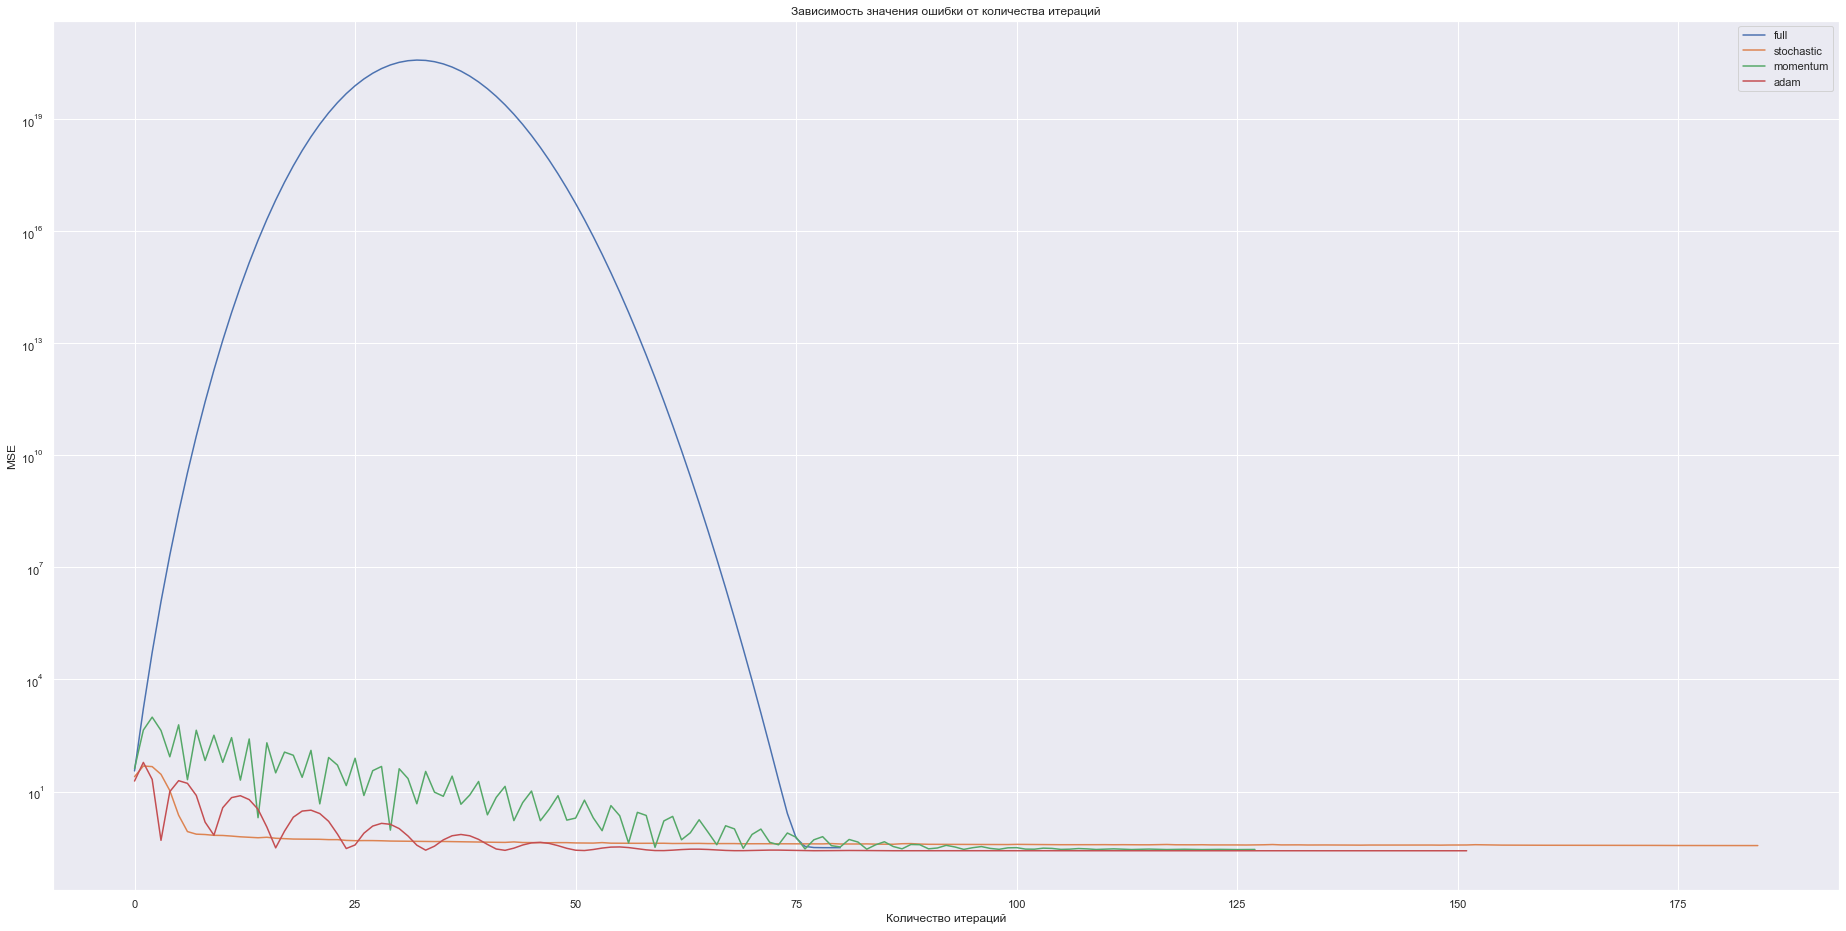

In [30]:
plt.figure(figsize=(32, 16))

for name, model in find_models.items():
    plt.plot(model.loss_history, label=name)
plt.ylabel("MSE")
plt.xlabel("Количество итераций")
plt.title("Зависимость значения ошибки от количества итераций")
plt.legend()
plt.yscale("log")
plt.show()

Метод ФУЛЛ после 80ой итерации слабо приближает ошибку к нулю, поэтому 80 итераций самые оптимальные.
Stochastic быстрее всех приближает ошибку к нулю и с самого начала движется в правильную сторону.
Методы Адам и Моментум движутся скачками, но тоже в правильную сторону.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [31]:
def benchmark(func):
    import time
    def wrapper(batch_size, k):
        start = time.time()
        steps = func(batch_size, k)
        end = time.time()
        tm = end - start
        mean_time = tm/k
        mean_steps = steps/k
#         print("mean time = ", mean_time, "\n mean steps = ", mean_steps)
        return (mean_time, mean_steps)
    return wrapper

In [32]:
batch_sizes = np.arange(5, 500, 10)

k = 10

y_sup = y_train.reset_index()
y_sup = y_sup.drop(columns='index')["log_price"]


def stochastic(batch_size):
    descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 0.5134832907437552,
            'batch_size' : batch_size
                }
        }
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train, y_sup)
    steps = len(regression.loss_history)
    return steps

@benchmark
def stochastic_iterations(batch_size, k):
    steps = 0
    for _ in range(k):
        steps += stochastic(batch_size)
    return steps
    

def run_stochastic(batch_sizes, k):
    list_of_mean_time = []
    list_of_mean_steps = []
    for batch_size in tqdm(batch_sizes):
        tm, steps = stochastic_iterations(batch_size, k)
        list_of_mean_time.append(tm)
        list_of_mean_steps.append(steps)
    return (list_of_mean_time, list_of_mean_steps)

list_of_mean_time, list_of_mean_steps = run_stochastic(batch_sizes, k)

100%|██████████| 50/50 [10:59<00:00, 13.19s/it]


In [33]:
print("Среднее время: ", list_of_mean_time)
print()
print("Среднее количество итераций: ", list_of_mean_steps)

Среднее время:  [2.965699887275696, 3.0940463066101076, 3.1703165054321287, 2.951366901397705, 2.636413311958313, 2.5429614067077635, 1.9547957181930542, 2.1013351917266845, 1.9458498001098632, 1.663390588760376, 1.6212208986282348, 1.6355118989944457, 1.3624593019485474, 1.425649881362915, 1.4467177867889405, 1.1890685081481933, 1.2945172309875488, 1.20694420337677, 1.256610894203186, 1.154148817062378, 1.1089149951934814, 1.0657624006271362, 1.0749742984771729, 1.0974413871765136, 0.9894992113113403, 1.0593994855880737, 0.9500341653823853, 0.9188715934753418, 0.9594743013381958, 0.9177259206771851, 0.9469478130340576, 0.9003172159194947, 0.9008421897888184, 0.8327959060668946, 0.8764714956283569, 0.7954355001449585, 0.9261068105697632, 0.8674789905548096, 0.8138986110687256, 0.8310492277145386, 0.7547780036926269, 1.0328371047973632, 0.9630378961563111, 0.9972124099731445, 0.8452277183532715, 0.8084176063537598, 0.8490383148193359, 0.784968090057373, 0.7241746187210083, 0.75664680004

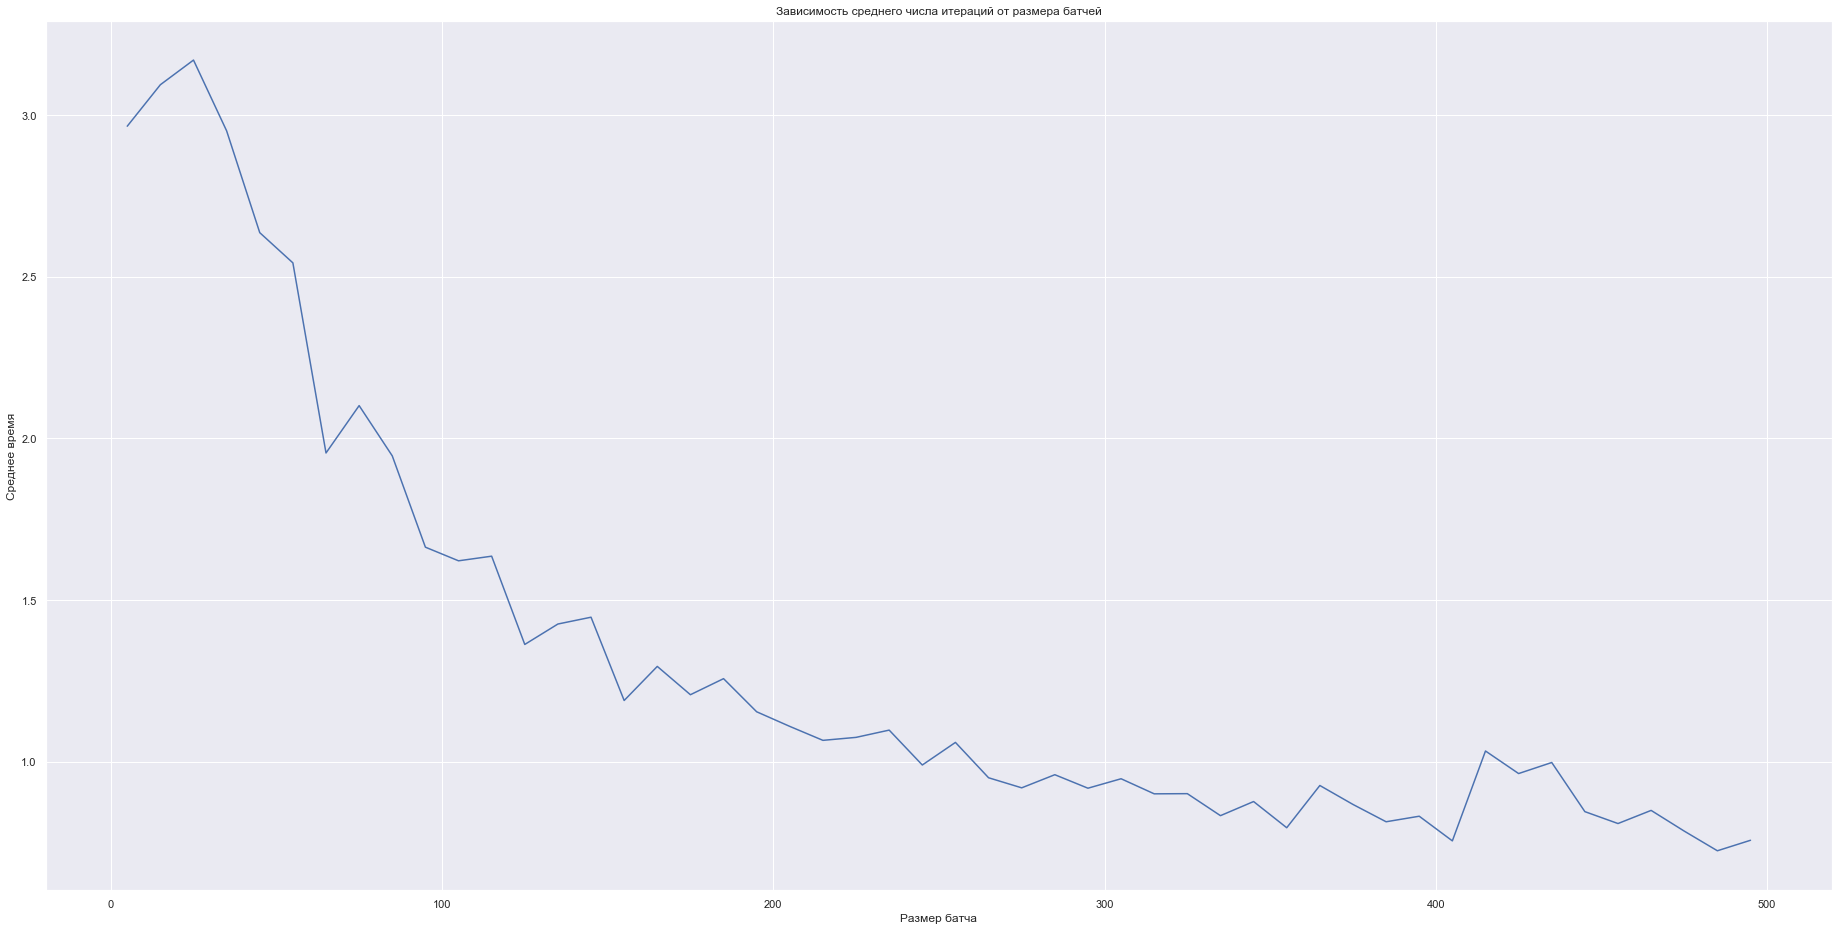

In [34]:
plt.figure(figsize=(32, 16))
plt.plot(batch_sizes, list_of_mean_time)
plt.ylabel("Среднее время")
plt.xlabel("Размер батча")
plt.title("Зависимость среднего числа итераций от размера батчей")
plt.show()

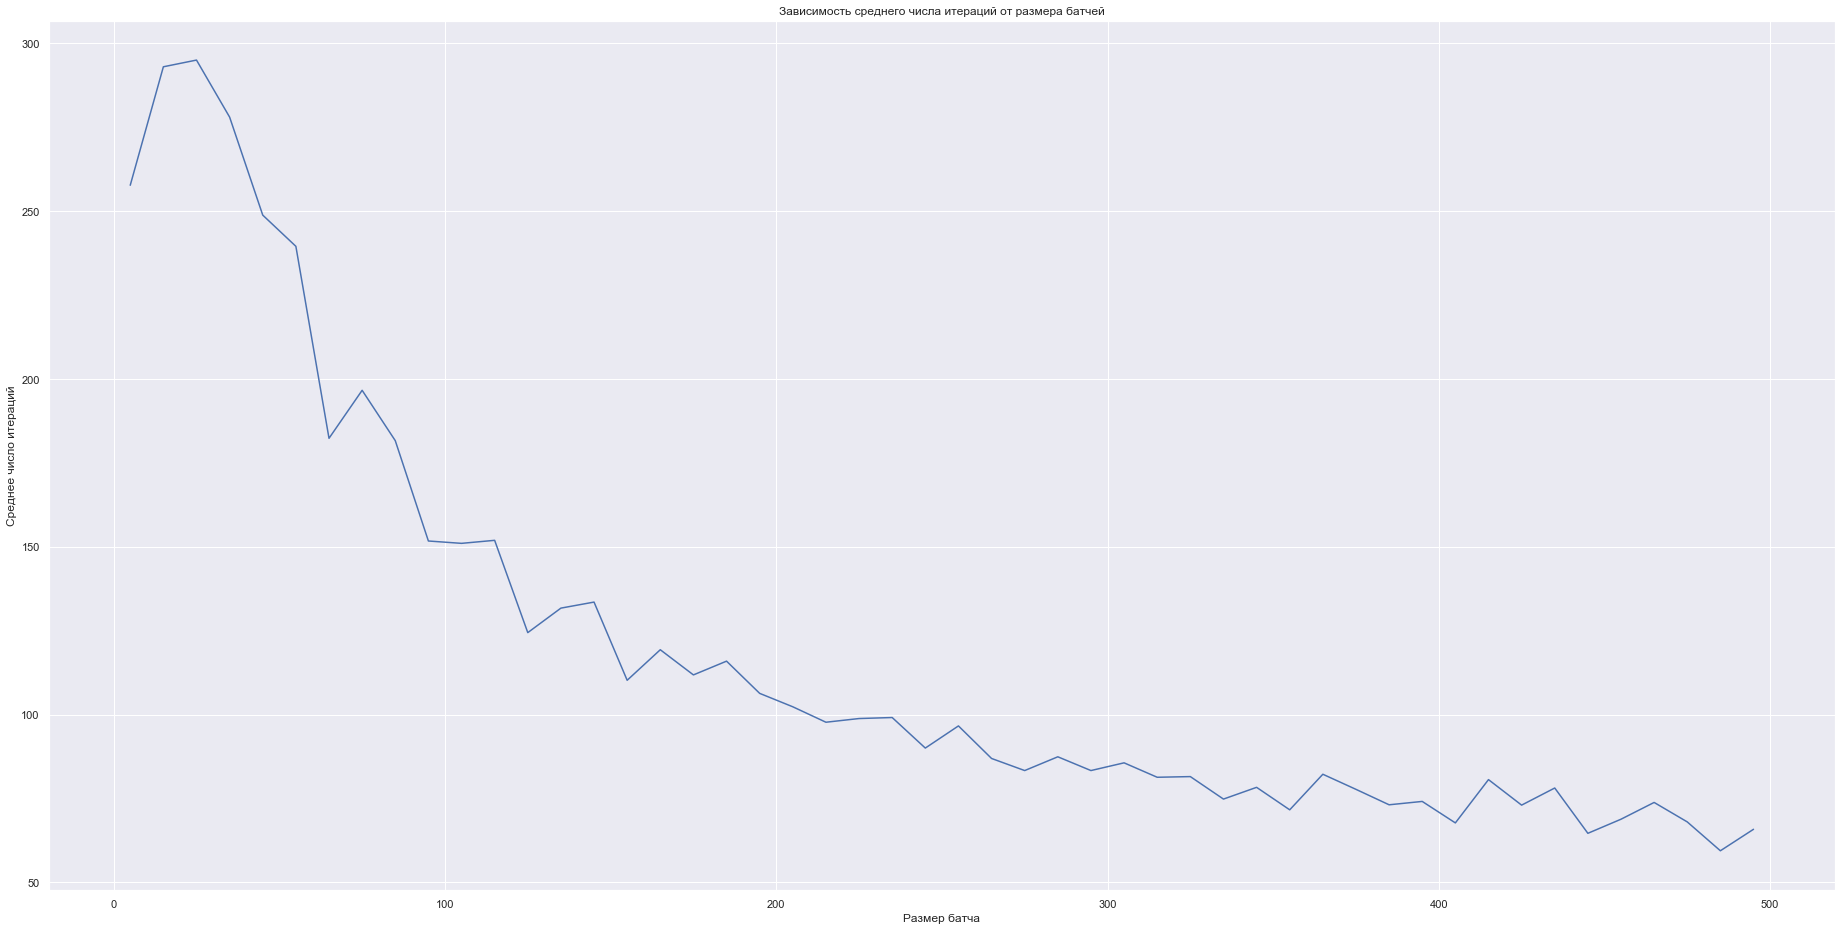

In [35]:
plt.figure(figsize=(32, 16))
plt.plot(batch_sizes, list_of_mean_steps)
plt.ylabel("Среднее число итераций")
plt.xlabel("Размер батча")
plt.title("Зависимость среднего числа итераций от размера батчей")
plt.show()

По графикам видно, что чем больше batch_size, тем меньше итераций и времени требуется для схождения.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: id: 55545911 ссылка: https://contest.yandex.ru/contest/29933/run-report/55545911/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [60]:
from linear_regression import LinearRegression
from sklearn.metrics import r2_score


find_lambdas = dict()
find_losses = dict()
find_models = dict()
find_r2_lambdas = dict()
find_r2_losses = dict()
find_r2_models = dict()
best_r2_lambda = lambdas[0]
best_labda = lambdas[0]
best_loss = 0
best_r2_loss = 0
best_model = 0
best_r2_model = 0
it = 1
for lambda_ in tqdm(lambdas):
#     print(it)
    descent_config = {
        'descent_name': 'full',
        'regularized' : True,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': lambda_
        }
    }
    regression = LinearRegression(descent_config=descent_config)
    model = regression.fit(X_train, y_train)
    y_pred = regression.predict(X_val)
    loss = mean_squared_error(y_val, y_pred)
    r2_loss = r2_score(y_val, y_pred)
    if it == 1:
        best_loss = loss
        best_model = model
        best_r2_loss = r2_loss
        best_r2_model = model
    else:
        if loss < best_loss:
            best_loss = loss
            best_labda = lambda_
            best_model = model
        if r2_loss < best_r2_loss:
            best_r2_loss = r2_loss
            best_r2_lambda = lambda_
            best_r2_model = model
    it += 1

mues = np.logspace(-1, 1, 10)
find_mues = dict()
best_mu = mues[0]
for mu in tqdm(mues):
#     print(it)
    descent_config = {
        'descent_name': 'full',
        'regularized' : True,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': mu
        }
    }
    regression = LinearRegression(descent_config=descent_config)
    model = regression.fit(X_train, y_train)
    y_pred = regression.predict(X_val)
    loss = mean_squared_error(y_val, y_pred)
    r2_loss = r2_score(y_val, y_pred)
    if it == 1:
        best_loss = loss
        best_model = model
        best_r2_loss = r2_loss
        best_r2_model = model
    else:
        if loss < best_loss:
            best_loss = loss
            best_mu = mu
            best_model = model
        if r2_loss < best_r2_loss:
            best_r2_loss = r2_loss
            best_mu = mu
            best_r2_model = model
    it += 1


    
find_lambdas["full"] = best_labda
find_mues["full"] = best_mu
find_losses["full"] = best_loss
find_models["full"] = best_model

find_r2_lambdas["full"] = best_r2_lambda
find_r2_losses["full"] = best_r2_loss
find_r2_models["full"] = best_r2_model

 90%|█████████ | 9/10 [00:13<00:02,  2.46s/it]/Users/umni/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/umni/Desktop/HSE/3 курс/ML-1/дз 3/linear_regression.py:40: RuntimeWarning: overflow encountered in square
  if np.sum(np.square(cur_w)) < self.tolerance or np.isnan(cur_w.any()):
/Users/umni/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:243: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/Users/umni/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:552: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
100%|██████████| 10/10 [00:16<00:00,  1.66s/it]


In [ ]:
best_labda = lambdas[0]
best_mu = mues[0]
best_r2_labda = lambdas[0]
it = 1

y_sup_train = y_train.reset_index().drop(columns="index")["log_price"]
y_sup_val = y_val.reset_index().drop(columns="index")["log_price"]
y_sup_test = y_test.reset_index().drop(columns="index")["log_price"]

for lambda_ in tqdm(lambdas):
    descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': lambda_
        }
    }
    regression = LinearRegression(descent_config=descent_config)
    model = regression.fit(X_train, y_sup_train)
    y_pred = regression.predict(X_val)
    loss = mean_squared_error(y_sup_val, y_pred)
    r2_loss = r2_score(y_sup_val, y_pred)
    if it == 1:
        best_loss = loss
        best_model = model
    else:
        if loss < best_loss:
            best_loss = loss
            best_labda = lambda_
            best_model = model
        if r2_loss < best_r2_loss:
            best_r2_loss = r2_loss
            best_r2_lambda = lambda_
            best_r2_model = model
    it += 1

mues = np.logspace(-1, 1, 10)
find_mues = dict()
best_mu = mues[0]
for mu in tqdm(mues):
#     print(it)
    descent_config = {
        'descent_name': 'full',
        'regularized' : True,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': mu
        }
    }
    regression = LinearRegression(descent_config=descent_config)
    model = regression.fit(X_train, y_train)
    y_pred = regression.predict(X_val)
    loss = mean_squared_error(y_val, y_pred)
    r2_loss = r2_score(y_val, y_pred)
    if it == 1:
        best_loss = loss
        best_model = model
        best_r2_loss = r2_loss
        best_r2_model = model
    else:
        if loss < best_loss:
            best_loss = loss
            best_mu = mu
            best_model = model
        if r2_loss < best_r2_loss:
            best_r2_loss = r2_loss
            best_mu = mu
            best_r2_model = model
    it += 1


    
find_lambdas["stochastic"] = best_labda
find_mues["stochastic"] = best_mu
find_losses["stochastic"] = best_loss
find_models["stochastic"] = best_model

find_r2_lambdas["stochastic"] = best_r2_lambda
find_r2_losses["stochastic"] = best_r2_loss
find_r2_models["stochastic"] = best_r2_model

In [ ]:
best_labda = lambdas[0]
best_r2_labda = lambdas[0]
it = 1
for lambda_ in tqdm(lambdas):
    descent_config = {
        'descent_name': 'momentum',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': lambda_
        }
    }
    regression = LinearRegression(descent_config=descent_config)
    model = regression.fit(X_train, y_train)
    y_pred = regression.predict(X_val)
    loss = mean_squared_error(y_val, y_pred)
    r2_loss = r2_score(y_val, y_pred)
    if it == 1:
        best_loss = loss
        best_model = model
    else:
        if loss < best_loss:
            best_loss = loss
            best_labda = lambda_
            best_model = model
        if r2_loss < best_r2_loss:
            best_r2_loss = r2_loss
            best_r2_lambda = lambda_
            best_r2_model = model
    it += 1

mues = np.logspace(-1, 1, 10)
find_mues = dict()
best_mu = mues[0]
for mu in tqdm(mues):
#     print(it)
    descent_config = {
        'descent_name': 'full',
        'regularized' : True,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': mu
        }
    }
    regression = LinearRegression(descent_config=descent_config)
    model = regression.fit(X_train, y_train)
    y_pred = regression.predict(X_val)
    loss = mean_squared_error(y_val, y_pred)
    r2_loss = r2_score(y_val, y_pred)
    if it == 1:
        best_loss = loss
        best_model = model
        best_r2_loss = r2_loss
        best_r2_model = model
    else:
        if loss < best_loss:
            best_loss = loss
            best_mu = mu
            best_model = model
        if r2_loss < best_r2_loss:
            best_r2_loss = r2_loss
            best_mu = mu
            best_r2_model = model
    it += 1


    
find_lambdas["momentum"] = best_labda
find_mues["momentum"] = best_mu
find_losses["momentum"] = best_loss
find_models["momentum"] = best_model

find_r2_lambdas["momentum"] = best_r2_lambda
find_r2_losses["momentum"] = best_r2_loss
find_r2_models["momentum"] = best_r2_model

In [ ]:
best_labda = lambdas[0]
best_r2_labda = lambdas[0]
it = 1
for lambda_ in tqdm(lambdas):
    descent_config = {
        'descent_name': 'adam',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': lambda_
        }
    }
    regression = LinearRegression(descent_config=descent_config)
    model = regression.fit(X_train, y_train)
    y_pred = regression.predict(X_val)
    loss = mean_squared_error(y_val, y_pred)
    r2_loss = r2_score(y_val, y_pred)
    if it == 1:
        best_loss = loss
        best_model = model
    else:
        if loss < best_loss:
            best_loss = loss
            best_labda = lambda_
            best_model = model
        if r2_loss < best_r2_loss:
            best_r2_loss = r2_loss
            best_r2_lambda = lambda_
            best_r2_model = model
    it += 1

mues = np.logspace(-1, 1, 10)
find_mues = dict()
best_mu = mues[0]
for mu in tqdm(mues):
#     print(it)
    descent_config = {
        'descent_name': 'full',
        'regularized' : True,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': mu
        }
    }
    regression = LinearRegression(descent_config=descent_config)
    model = regression.fit(X_train, y_train)
    y_pred = regression.predict(X_val)
    loss = mean_squared_error(y_val, y_pred)
    r2_loss = r2_score(y_val, y_pred)
    if it == 1:
        best_loss = loss
        best_model = model
        best_r2_loss = r2_loss
        best_r2_model = model
    else:
        if loss < best_loss:
            best_loss = loss
            best_mu = mu
            best_model = model
        if r2_loss < best_r2_loss:
            best_r2_loss = r2_loss
            best_mu = mu
            best_r2_model = model
    it += 1


    
find_lambdas["adam"] = best_labda
find_mues["adam"] = best_mu
find_losses["adam"] = best_loss
find_models["adam"] = best_model

find_r2_lambdas["adam"] = best_r2_lambda
find_r2_losses["adam"] = best_r2_loss
find_r2_models["adam"] = best_r2_model

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регресии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

In [37]:
# YOUR CODE:

### Социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, пора гулять в парках и общаться со своими одногруппниками. Прикрепите фотографию вашей прогулки с минимум пятью одногруппниками по какому-нибудь парку или бульвару. Кратко опишите ваши впечатления.

![](AutumnWalk.jpg)

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [38]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [39]:
# YOUR CODE: